In [72]:
import numpy as np
import matplotlib.pyplot as plt
from models.training import easyTrainer, weights_to_dataset
from models.nODE import nODE, make_nODE_from_parameters
import scipy
import torch

In [4]:
# 5D repressilator

In [91]:
dim = 7

gamma = - np.ones([dim])
Wout = 2 * np.eye(dim)
Win = np.zeros([dim, dim])
for i in range(dim - 1):
    Win[i, i + 1] = -1
Win[dim - 1, 0] = -1
bin, bout = 2 * np.ones([dim, 1]), 2 * np.ones([dim, 1])

node_5Drepr = make_nODE_from_parameters(gamma, Win=Win, bin=bin, Wout=Wout, bout=bout)


In [92]:
x = np.array([1., 2, 3, 4, 5, 6, 7])
traj = node_5Drepr.trajectory(torch.tensor([1., 2, 3, 4, 5, 6, 7]), time_interval=[0, 20]).detach().numpy()

In [93]:
np.shape(traj)

(100, 7)

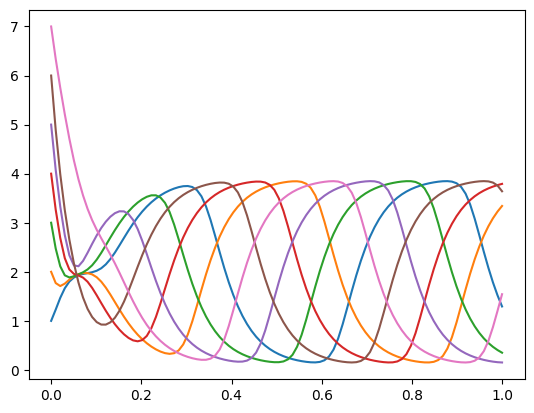

In [95]:
time = np.linspace(0,1,np.shape(traj)[0])
for i in range(dim):
    plt.plot(time, traj[:,i])

In [59]:
def f(t, x):
    return np.multiply(gamma, x) + bout + np.matmul(Wout, np.tanh( np.matmul(Win, x) + bin) )

In [61]:
f(0, np.array([[1],[2], [3], [4], [5]]))

array([[ 1.        ],
       [-1.52318831],
       [-2.92805516],
       [-3.99010951],
       [-1.47681169]])

In [68]:
scipy.integrate.solve_ivp(lambda t, x: f(t, x.T).T, [0, 10], x.T[0]) 

ValueError: could not broadcast input array from shape (5,5) into shape (5,)

In [67]:
x.T[0]

array([1, 2, 3, 4, 5])